#  K-NN classifier to predict the presence of heart disease in a patient or not

age — age in years 

sex — (1 = male; 0 = female) 

cp — chest pain type 

trestbps — resting blood pressure (in mm Hg on admission to the hospital) 

chol — serum cholestoral in mg/dl 

fbs — (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

restecg — resting electrocardiographic results

thalach — maximum heart rate achieved 

exang — exercise induced angina (1 = yes; 0 = no) 

oldpeak — ST depression induced by exercise relative to rest 

slope — the slope of the peak exercise ST segment 

ca — number of major vessels (0–3) colored by flourosopy 

thal — 3 = normal; 6 = fixed defect; 7 = reversable defect 

target — have disease or not (1=yes, 0=no)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### Load Dataset and perform EDA

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

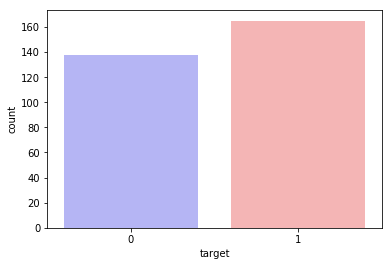

In [5]:
#Count of the number of patients having heart disease
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

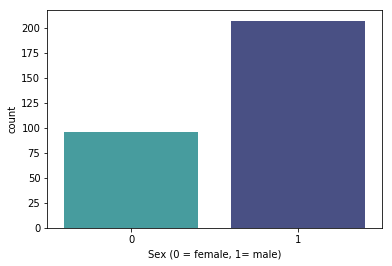

In [6]:
#Count of the male and female having heart disease
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

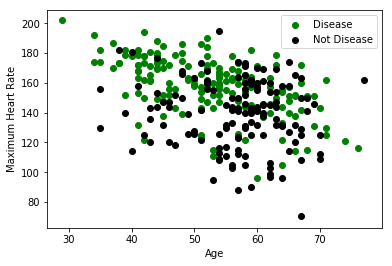

In [7]:
#Relation between “Maximum Heart Rate” and “Age”
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], c = 'black')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

### Split the dataset

In [8]:
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values

In [9]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.25, random_state= 0)

### Preprocessing – Scaling the features

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()  
scaler.fit(X_train)    
X_train_normed = pd.DataFrame(scaler.transform(X_train))
X_test_normed = pd.DataFrame(scaler.transform(X_test))

### Fitting the Model and computing the accuracy

In [15]:
accuracy_val = [] #to store accuracy values for different k
for K in range(20):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K, metric = 'minkowski', p = 2)

    model.fit(X_train_normed, y_train)  #fit the model
    y_pred=model.predict(X_test_normed) #make prediction on test set
    
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    accuracy_val.append(accuracy) #store rmse values
    print('Accuracy value for k= ' , K , 'is:',accuracy)

Accuracy value for k=  1 is: 0.8157894736842105
Accuracy value for k=  2 is: 0.7894736842105263
Accuracy value for k=  3 is: 0.8552631578947368
Accuracy value for k=  4 is: 0.881578947368421
Accuracy value for k=  5 is: 0.868421052631579
Accuracy value for k=  6 is: 0.8421052631578947
Accuracy value for k=  7 is: 0.8552631578947368
Accuracy value for k=  8 is: 0.8157894736842105
Accuracy value for k=  9 is: 0.8289473684210527
Accuracy value for k=  10 is: 0.8157894736842105
Accuracy value for k=  11 is: 0.7894736842105263
Accuracy value for k=  12 is: 0.7763157894736842
Accuracy value for k=  13 is: 0.7894736842105263
Accuracy value for k=  14 is: 0.7763157894736842
Accuracy value for k=  15 is: 0.7631578947368421
Accuracy value for k=  16 is: 0.7763157894736842
Accuracy value for k=  17 is: 0.75
Accuracy value for k=  18 is: 0.75
Accuracy value for k=  19 is: 0.7368421052631579
Accuracy value for k=  20 is: 0.75


### Confusion matrix

In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[22 11]
 [ 8 35]]


In the output, 22 and 35 are correct predictions, and 11 and 8 are incorrect predictions.